<a href="https://colab.research.google.com/github/DurdenTyler2008/car_image_classification/blob/main/%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2%D1%8A%D0%B5%D0%B7%D0%B4_%D0%B2%D1%8B%D0%B5%D0%B7%D0%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Модель,предсказывающая въезжает автомобиль или выезжает:
задача классификации изображений, предсказание бинарное

###План:


1.   Загружаю базу 
2.   Разделяю существующую базу: test=15%, val=15%
3.   Готовлю фото для модели с помощью ImageDataGenerator
4.   Создаю модель и обучаю
5.   т.к. количество фото малое - провожу аугументацию
6.   


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import cv2
%matplotlib inline

###1.Загружаю базу:

In [ ]:
!unzip '/content/drive/MyDrive/Диплом/Model_2/База bask.zip' -d '/content/drive/MyDrive/Диплом/Model_2'

In [ ]:
!unzip '/content/drive/MyDrive/Диплом/Model_2/База face.zip' -d '/content/drive/MyDrive/Диплом/Model_2'

In [ ]:
!unzip '//content/drive/MyDrive/Диплом/Model_2/data all.zip' -d '/content/drive/MyDrive/Диплом/Model_2'

In [ ]:
path = '/content/drive/MyDrive/Диплом/Model_2'
os.listdir(path)

['База bask.zip', 'База face.zip', 'База face', 'База bask']

In [ ]:
#!rm -R '/content/drive/MyDrive/Диплом/База въезд-выезд'
#!rm -R '/content/drive/MyDrive/Диплом/Model_2/Data all.zip'

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import cv2
%matplotlib inline

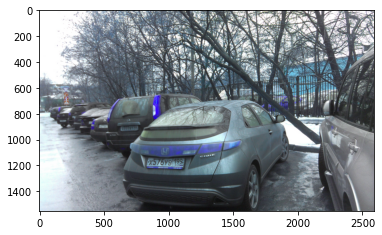

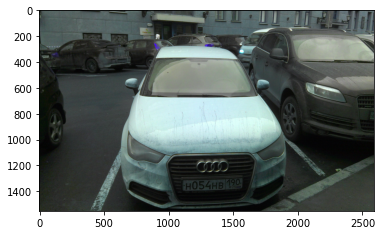

In [ ]:
im_b = cv2.imread('/content/drive/MyDrive/Диплом/Model_2/all_foto/bask.10.jpg')
im_f = cv2.imread('/content/drive/MyDrive/Диплом/Model_2/all_foto/face.54.jpg')

plt.imshow(im_b)
plt.show()
plt.imshow(im_f)
plt.show()

In [ ]:
img_face = '/content/drive/MyDrive/Диплом/Model_2/all_foto'
img_face_len = os.listdir(img_face)
print('Кол-во фото all:', len(img_face_len))

Кол-во фото all: 208


In [ ]:
image = cv2.imread('/content/drive/MyDrive/Диплом/Model_2/all_foto/bask.10.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
color = np.size(image, 2)

print('height:', height)
print('width:', width)
print('color', color)

height: 1552
width: 2592
color 3


###Разделяю существующую базу: test=15%, val=15%

In [ ]:
import shutil
import os
from IPython.display import Image

In [ ]:
data_dir = '/content/drive/MyDrive/Диплом/Model_2/train'
train_dir = 'train'                       #для обучения
val_dir = 'val'                           #для проверки
test_dir = 'test'                         #для тестирования
test_data_portion = 0.15                  #часть данных для тестирования
val_data_portion = 0.15                   #часть данных для проверки
nb_images = 104                           #количество фото в одном классе

In [ ]:
def create_directory(dir_name):           #функция создания папок(подпапок)для обучения,проверки,тестирования

    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name)
    os.makedirs(os.path.join(dir_name, 'face'))
    os.makedirs(os.path.join(dir_name, 'bask'))

In [ ]:
create_directory(train_dir)               #создал папки(подпапки)
create_directory(val_dir)
create_directory(test_dir)

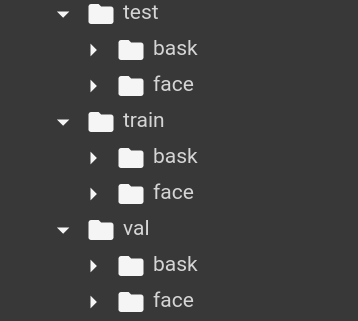

In [ ]:
Image('/content/drive/MyDrive/Диплом/Model_2/папки_подпапки.png', width=300, height=150)

In [ ]:
def copy_images(start_index, end_index, source_dir, dest_dir):  #функция копирования фото по подпапкам

    for i in range(start_index, end_index):
        shutil.copy2(os.path.join(source_dir, "face." + str(i) + ".jpg"), 
            os.path.join(dest_dir, "face"))
        shutil.copy2(os.path.join(source_dir, "bask." + str(i) + ".jpg"), 
            os.path.join(dest_dir, "bask"))

In [ ]:
start_val_data_idx = int(nb_images * (1 - val_data_portion - test_data_portion))
start_test_data_idx = int(nb_images * (1 - test_data_portion))

print(start_val_data_idx)          #вычисляю индекс, с которого начнутся фото проверочной базы
print(start_test_data_idx)         #вычисляю индекс, с которого начнутся фото тестовой базы

72
88


In [ ]:
copy_images(1, start_val_data_idx, data_dir, train_dir)                 #записываю фото в базу обучения
copy_images(start_val_data_idx, start_test_data_idx, data_dir, val_dir) #записываю фото в базу проверки
copy_images(start_test_data_idx, nb_images, data_dir, test_dir)         #записываю фото в базу теста

In [ ]:
img_number = '/content/drive/MyDrive/Диплом/Model_2/val/val_face'     #проверяю,что фото скопированны
img_number_len = os.listdir(img_number)
print('Кол-во фото :', len(img_number_len))

Кол-во фото : 16


In [ ]:
img_number = '/content/drive/MyDrive/Диплом/Model_2/train/train_bask' #проверяю,что фото скопированны
img_number_len = os.listdir(img_number)
print('Кол-во фото :', len(img_number_len))

Кол-во фото : 72


In [ ]:
img_number = '/content/drive/MyDrive/Диплом/Model_2/test/test_face'   #проверяю,что фото скопированны
img_number_len = os.listdir(img_number)
print('Кол-во фото :', len(img_number_len))

Кол-во фото : 16


###Готовлю фото для модели с помощью ImageDataGenerator

In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/content/drive/MyDrive/Диплом/Model_2/train'     #папка с фото для обучения
val_dir = '/content/drive/MyDrive/Диплом/Model_2/val'         #папка с фото для проверки
test_dir = '/content/drive/MyDrive/Диплом/Model_2/test'       #папка с фото для тестирования
img_width, img_height = 150, 150                              #размеры изображения

input_shape = (img_width, img_height, 3)                      #входные размеры
epochs = 40
batch_size = 7
nb_train_samples = 144                                        #количество фото для обучения
nb_validation_samples = 32                                    #количество фото для проверки
nb_test_samples = 32                                          #количество фото для тестирования

In [ ]:
#img_shape = 150
datagen = ImageDataGenerator(rescale=1./255)                  #нормализую, привожу к 0-1(255 -размер значений пикселей)

In [ ]:
train_generator = datagen.flow_from_directory(
                                              train_dir,
                                              target_size=(img_width, img_height),
                                              batch_size=batch_size,
                                              class_mode='binary')    #готовлю обучающую базу для модели

Found 144 images belonging to 3 classes.


In [ ]:
val_generator = datagen.flow_from_directory(
                                            val_dir,
                                            target_size=(img_width, img_height),
                                            batch_size=batch_size,
                                            class_mode='binary')      #готовлю проверочную базу для модели

Found 32 images belonging to 3 classes.


In [ ]:
test_generator = datagen.flow_from_directory(
                                            test_dir,
                                            target_size=(img_width, img_height),
                                            batch_size=batch_size,
                                            class_mode='binary')     #готовлю тестовую базу для модели

Found 32 images belonging to 3 classes.


###Создаю модель и обучаю:

In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
import time
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()

def create_model(x,y,z,j):

    model.add(Conv2D(x, (3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(y, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(z, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(j, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))



    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    return model

In [ ]:
create_model(16, 32, 32, 64)

In [ ]:
'''
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
'''

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 16)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
activation_7 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 32)       

In [ ]:
curTime = time.time()
history = model.fit_generator(
                              train_generator,
                              steps_per_epoch=nb_train_samples // batch_size,
                              epochs=epochs,
                              validation_data=val_generator,
                              validation_steps=nb_validation_samples // batch_size, verbose=0)
print('Обучение модели заняло: ', round((time.time() - curTime) / 60, 2), 'min')
print('accuracy', history.history['accuracy'][39])
print('val_accuracy', history.history['val_accuracy'][39])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Обучение модели заняло:  13.64 min
accuracy 0.5036496520042419
val_accuracy 0.4642857015132904


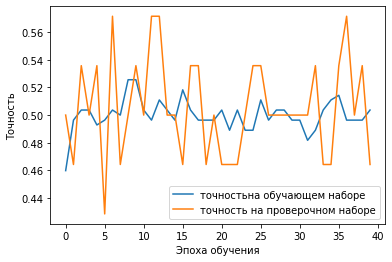

In [ ]:
plt.plot(history.history['accuracy'], label='точностьна обучающем наборе')
plt.plot(history.history['val_accuracy'], label='точность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [ ]:
'''
Результаты на разных гиперпараметрах:
1: 0.48507463932037354  0.5 Обучение модели заняло:  13.09 min
2: 0.49253731966018677  0,5 Обучение модели заняло:  13.08 min
3: 0.5149253606796265   0.5333333611488342  Обучение модели заняло:  12.62 min
4: 0.5149253606796265 0,5 Обучение модели заняло:  12.23 min
5:  0.49635037779808044  0.4642857015132904  Обучение модели заняло:  12.12 min
6: 0.5714285969734192 0.2857142984867096 Обучение модели заняло:  3.23 min
7: 0.49640288949012756 0.5 Обучение модели заняло:  11.84 min
8: 0.5035971403121948   0.5333333611488342 Обучение модели заняло:  12.55 min
вывод: модель не обучается
'''

### MobileNetV2:

In [ ]:
# это не работает, план был попробовать то же на обученной нейросети из keras

In [ ]:
import tensorflow as tf

mobilenet = tf.keras.applications.MobileNetV2()

14548992/14536120 [==============================] - 0s 0us/step


In [ ]:
mobilenet.summary()

In [ ]:
mobilenet.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

In [ ]:
base_layers = tf.keras.applications.MobileNetV2(input_shape=input_shape, include_top=False)

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
curTime = time.time()
history = mobilenet.fit_generator(
                              train_generator,
                              steps_per_epoch=nb_train_samples // batch_size,
                              epochs=epochs,
                              validation_data=val_generator,
                              validation_steps=nb_validation_samples // batch_size, verbose=1)
print('Обучение модели заняло: ', round((time.time() - curTime) / 60, 2), 'min')
print('accuracy', history.history['accuracy'][39])
print('val_accuracy', history.history['val_accuracy'][39])

In [ ]:
#########################################################

###Аугументация:

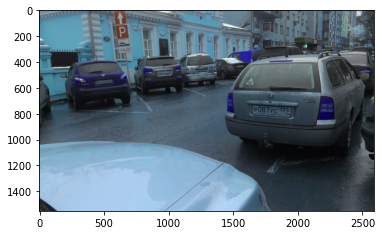

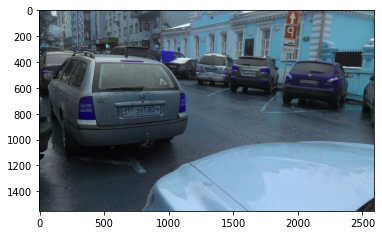

In [ ]:
im_b = cv2.imread('/content/drive/MyDrive/Диплом/Model_2/test/test_bask/bask.73.jpg')

plt.imshow(im_b)
plt.show()

plt.imshow(np.fliplr(im_b))
plt.show()

In [ ]:
from PIL import Image

im = Image.open('/content/drive/MyDrive/Диплом/Model_2/test/test_bask/bask.73.jpg')
im.rotate(115).show()
im

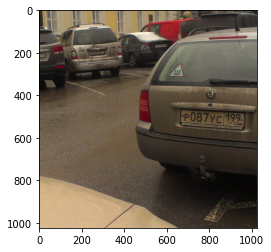

In [ ]:
#im_b = cv2.imread('/content/drive/MyDrive/Диплом/Model_2/test/test_bask/bask.73.jpg')
import cv2
import albumentations as A

transform = A.Compose([
 A.RandomCrop(1024, 1024),
 A.HorizontalFlip(p=0.5),
 A.HueSaturationValue(p=0.2),
])
image = cv2.imread('/content/drive/MyDrive/Диплом/Model_2/test/test_bask/bask.73.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#mask = cv2.imread('mask.png')
#mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
augmented = transform(image=image, mask=mask)
augmented_image = augmented['image']
#augmented_mask = augmented['mask']
plt.imshow(augmented_image)
plt.show()
#augmented_image

In [ ]:
im_path = '/content/drive/MyDrive/Диплом/Model_2/test/test_bask'
im_names = os.listdir(im_path)
print('назавания файлов:',im_names)
print('количество файлов:', len(im_names))

назавания файлов: ['bask.73.jpg', 'bask.77.jpg', 'bask.82.jpg', 'bask.74.jpg', 'bask.76.jpg', 'bask.75.jpg', 'bask.80.jpg', 'bask.78.jpg', 'bask.84.jpg', 'bask.81.jpg', 'bask.83.jpg', 'bask.79.jpg', 'bask.85.jpg', 'bask.88.jpg', 'bask.87.jpg', 'bask.86.jpg']
количество файлов: 16


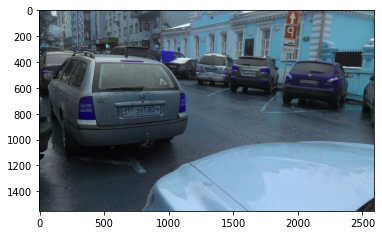

In [ ]:
handle = cv2.imread("/content/drive/MyDrive/Диплом/Model_2/test/test_bask/bask.73.jpg")
plt.imshow(np.fliplr(handle))
plt.show()
#handle

In [ ]:
import argparse

ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True, help="/content/drive/MyDrive/Диплом/Model_2/test/test_bask/bask.73.jpg")
args = vars(ap.parse_args())

image = cv2.imread(args["image"], cv2.IMREAD_GRAYSCALE)

cv2.imshow("Image", image)
cv2.waitKey(0)

usage: ipykernel_launcher.py [-h] -i IMAGE
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
labels = {}                                                                     #Создадим словарь для лэйблов       
for i in range(len(im_names)):                                                #Пройдемся по всем файлам с разметкой  
  with open(im_path, 'r') as f:                                    #открывая файл и загружая его в переменную temp     
      #temp = os.load(f)
      #print("File %s - %d labels" %(im_names[i], len(temp.keys())))           #Запишем какой файл с разметкой открыли
      #labels.update(temp)                                                       #Загрузим его содержимое в словарь

#print("Total - %d labels" % len(labels.keys()))                                 #В итоге получаем словарь labels с записями о разметке из всех файлов

In [ ]:
files = os.listdir('/content/drive/MyDrive/Диплом/Model_2/test/test_bask')
len(files)

16

In [ ]:
from PIL import Image

im = Image.open('/content/drive/MyDrive/Диплом/Model_2/all_foto/bask.11.jpg')
im.rotate(45).show()
im

UnidentifiedImageError: ignored

In [ ]:
#np.fliplr(files)
np.fliplr('/content/drive/MyDrive/Диплом/Model_2/all_foto/bask.11.jpg')

ValueError: ignored

In [ ]:
with open('test1.py',    # название открываемого/создаваемого файла
          'w'            # режим работы с файлом, "w" - write (перезапись), "r" - read (чтение)
          ) as f:  
  
    f.write(text.strip())

In [ ]:
os.path.dirname('/content/drive/MyDrive/Диплом/Model_2/test/test_bask')

'/content/drive/MyDrive/Диплом/Model_2/test'

In [ ]:
with open('/content/drive/MyDrive/Диплом/Model_2/all_foto/bask.11.jpg', "w") as f:
  plt.imshow(np.fliplr(f))
  plt.show()
